In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pymongo import MongoClient
import datetime

In [4]:
timeSeriesCountData = pd.DataFrame(columns=['symbol','date','count'])

In [5]:
client = MongoClient('mongodb://127.0.0.1:27017/')
db = client['mph']
collection_agg = db['token_aggs']

In [6]:
agg_data = collection_agg.find({'symbol':'ICON'})

In [7]:
index1 = 0

for agg_detail in agg_data:
    timeSeriesCountData.loc[index1, 'symbol'] = agg_detail['symbol']
    timeSeriesCountData.loc[index1,'date']= datetime.datetime.strptime(str(agg_detail['date']),'%Y%m%d')
    timeSeriesCountData.loc[index1, 'count'] = agg_detail['count'] # nomarlization
    index1+=1

In [8]:
timeSeriesCountData = timeSeriesCountData.sort_values(['date'])

In [9]:
startDate1 = "2018-03-02"
endDate1 = "2019-12-04"

startDate = datetime.datetime.strptime(startDate1,"%Y-%m-%d")
endDate = datetime.datetime.strptime(endDate1,"%Y-%m-%d")

monthDate = startDate +pd.DateOffset(months=3)

In [10]:
timeSeriesCountData1 = timeSeriesCountData.loc[(timeSeriesCountData['date'] >= startDate) & (timeSeriesCountData['date'] <= endDate), :]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


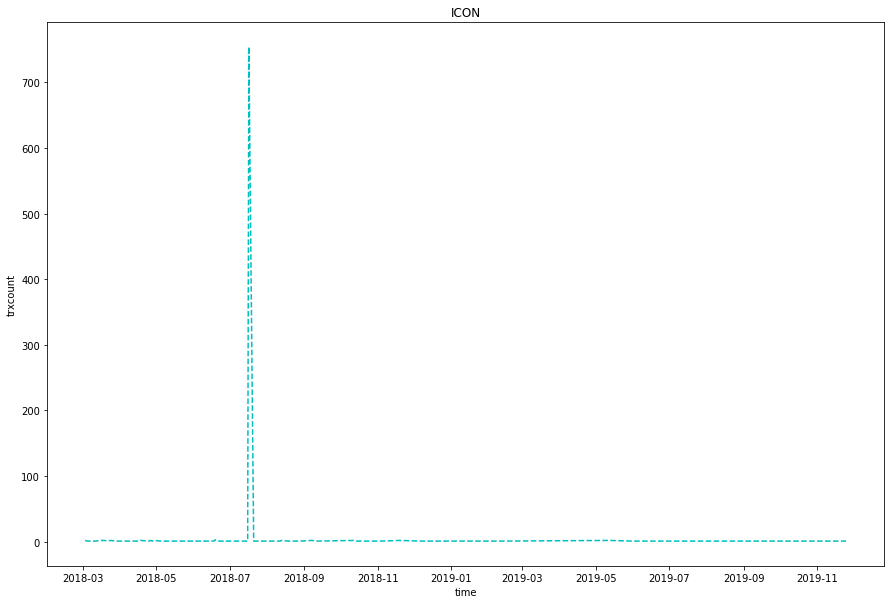

In [11]:
plt.figure(figsize=(15,10))
plt.plot(timeSeriesCountData1['date'].values, timeSeriesCountData1['count'].values, 'c--')
plt.title("ICON")
plt.xlabel('time')
plt.ylabel('trxcount')
plt.show()

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


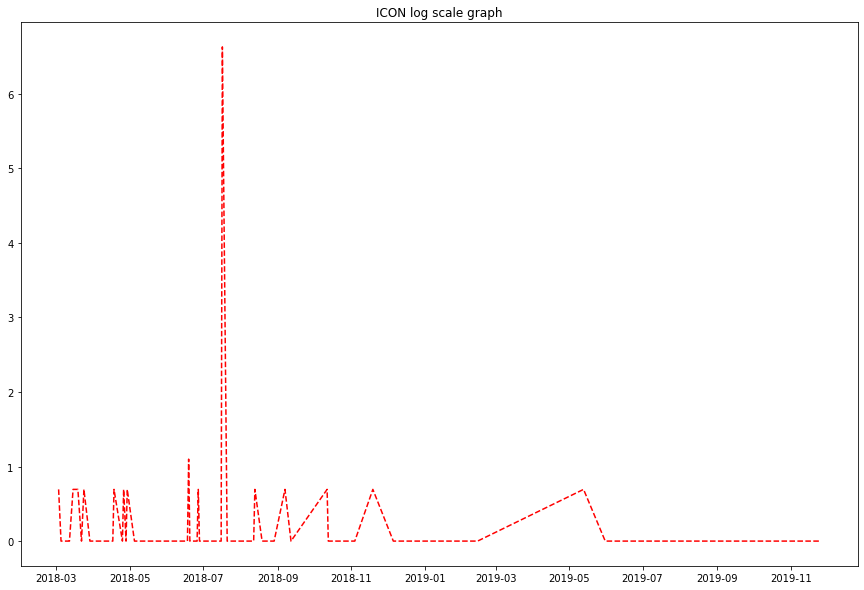

In [12]:
plt.figure(figsize=(15,10))
timeSeriesCountData1['log_count'] = np.log(np.array(timeSeriesCountData1['count'],dtype=np.float32))

plt.plot(timeSeriesCountData1['date'].values, timeSeriesCountData1['log_count'].values, 'r--')
plt.title('ICON log scale graph')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
scaler = StandardScaler()

In [30]:
timeSeriesCountData1['index'] = timeSeriesCountData1.index

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
data = timeSeriesCountData1[['index','log_count']]
data


,index,log_count
39,39,0.693147
40,40,0.000000
42,42,0.000000
41,41,0.000000
43,43,0.693147
...,...,...
109,109,0.000000
110,110,0.000000
111,111,0.000000
112,112,0.000000


In [67]:
np_scaled = scaler.fit_transform(data)
np_scaled

array([[-1.70910872, -0.10716864],
       [-1.6629166 , -0.11875026],
       [-1.57053234, -0.11875026],
       [-1.61672447, -0.11875026],
       [-1.52434021, -0.10716864],
       [-1.47814809, -0.10716864],
       [-1.38576383, -0.10716864],
       [-1.43195596, -0.11875026],
       [-1.3395717 , -0.10716864],
       [-1.29337958, -0.11875026],
       [-1.24718745, -0.11875026],
       [-1.20099532, -0.11875026],
       [-1.15480319, -0.11875026],
       [-1.10861106, -0.11875026],
       [-1.06241894, -0.11875026],
       [-1.01622681, -0.11875026],
       [-0.97003468, -0.11875026],
       [-0.92384255, -0.10716864],
       [-0.87765043, -0.11875026],
       [-0.8314583 , -0.10716864],
       [-0.78526617, -0.11875026],
       [-0.73907404, -0.10716864],
       [-0.69288192, -0.11875026],
       [-0.64668979, -0.11875026],
       [-0.60049766, -0.11875026],
       [-0.55430553, -0.11875026],
       [-0.5081134 , -0.11875026],
       [-0.46192128, -0.11875026],
       [-0.41572915,

In [68]:
data

,index,count
39,39,2
40,40,1
42,42,1
41,41,1
43,43,2
...,...,...
109,109,1
110,110,1
111,111,1
112,112,1


In [91]:
data = pd.DataFrame(np_scaled)
model = OneClassSVM(nu=0.001,kernel="rbf",gamma=0.00001)
model.fit(data)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=1e-05, kernel='rbf',
            max_iter=-1, nu=0.001, random_state=None, shrinking=True, tol=0.001,
            verbose=False)

In [92]:
timeSeriesCountData1['anomaly'] = pd.Series(model.predict(data))

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
timeSeriesCountData1

,symbol,date,count,log_count,anomaly,index
39,ICON,2018-03-03 00:00:00,2,0.693147,-1.0,39
40,ICON,2018-03-05 00:00:00,1,0.000000,-1.0,40
42,ICON,2018-03-07 00:00:00,1,0.000000,-1.0,42
41,ICON,2018-03-12 00:00:00,1,0.000000,-1.0,41
43,ICON,2018-03-15 00:00:00,2,0.693147,-1.0,43
...,...,...,...,...,...,...
109,ICON,2019-10-09 00:00:00,1,0.000000,NaN,109
110,ICON,2019-10-12 00:00:00,1,0.000000,NaN,110
111,ICON,2019-10-30 00:00:00,1,0.000000,NaN,111
112,ICON,2019-11-19 00:00:00,1,0.000000,NaN,112


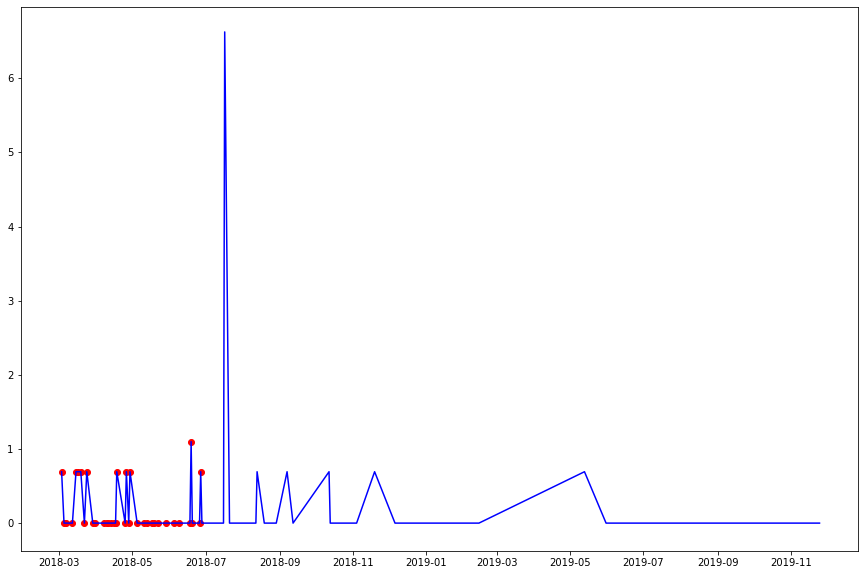

In [94]:
fig, ax = plt.subplots(figsize=(15,10))
a = timeSeriesCountData1.loc[timeSeriesCountData1['anomaly'] == -1, ['date', 'log_count']] #anomaly
ax.plot(timeSeriesCountData1['date'], timeSeriesCountData1['log_count'], color='blue')
ax.scatter(a['date'],a['log_count'], color='red')

In [108]:
from sklearn.cluster import KMeans
X = timeSeriesCountData1[['log_count']]
X = X.reset_index(drop=True)
km = KMeans(n_clusters=2)
km.fit(X)
km.predict(X)
labels = km.labels_

In [109]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [110]:
timeSeriesCountData1['label']=labels

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


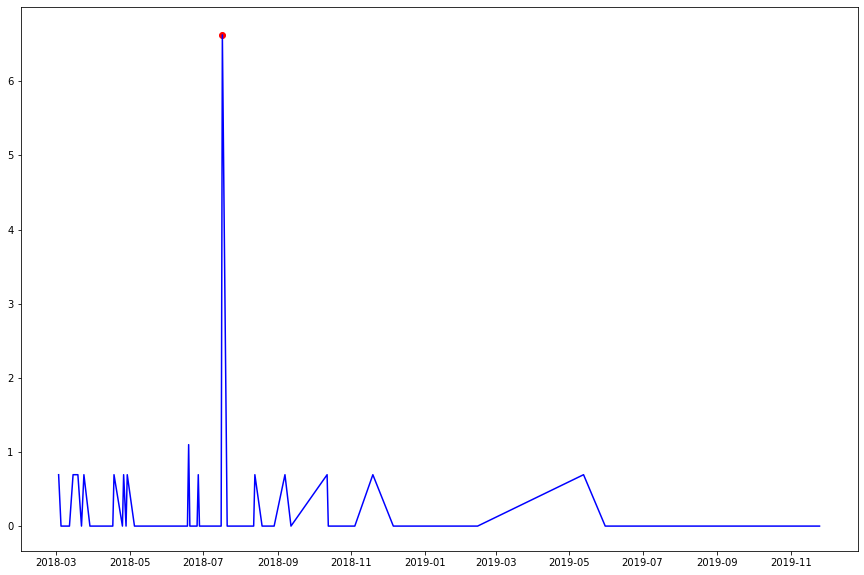

In [113]:
fig1, bx = plt.subplots(figsize=(15,10))
b = timeSeriesCountData1.loc[timeSeriesCountData1['label'] == 1, ['date', 'log_count']] #anomaly
bx.plot(timeSeriesCountData1['date'], timeSeriesCountData1['log_count'], color='blue')
bx.scatter(b['date'],b['log_count'], color='red')

In [114]:
b

,date,log_count
78,2018-07-17 00:00:00,6.625392
